In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import pickle
from moviepy.editor import VideoFileClip
from image_processing import *
from pipeline import *

%matplotlib inline

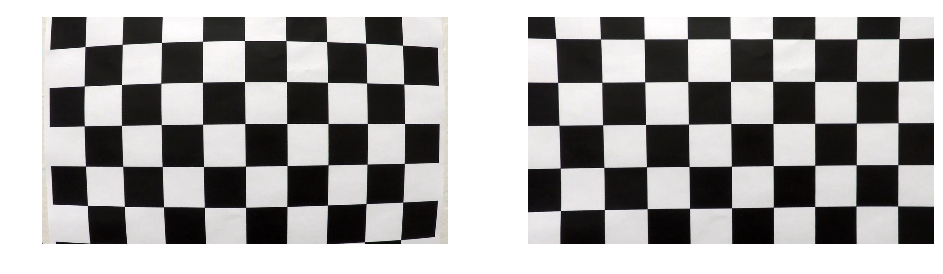

In [2]:
img = imread('./camera_cal/calibration1.jpg')
undist = undistort(img)

plt.figure(figsize=(11.5,8))
plt.subplot(121)
plt.axis('off')
plt.imshow(img)
plt.subplot(122)
plt.axis('off')
plt.imshow(undist)
plt.show()

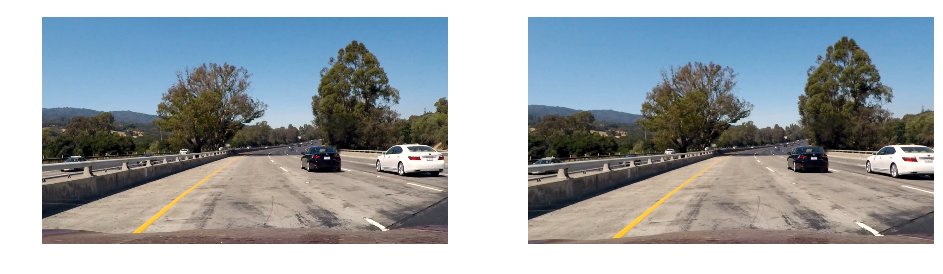

In [3]:
img = imread('./test_images/test1.jpg')
undist = undistort(img)

plt.figure(figsize=(11.5,8))
plt.subplot(121)
plt.axis('off')
plt.imshow(img)
plt.subplot(122)
plt.axis('off')
plt.imshow(undist)
plt.show()

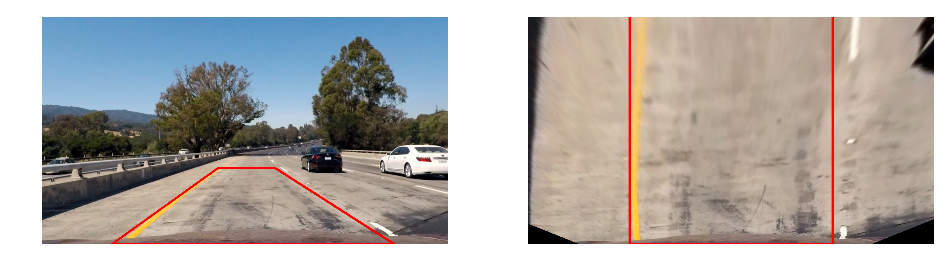

In [4]:
warped = warp(undist)
undist1 = draw_perspective(undist)
warped1 = draw_perspective(warped, True)

plt.figure(figsize=(11.5,8))
plt.subplot(121)
plt.axis('off')
plt.imshow(undist1)
plt.subplot(122)
plt.axis('off')
plt.imshow(warped1)
plt.show()

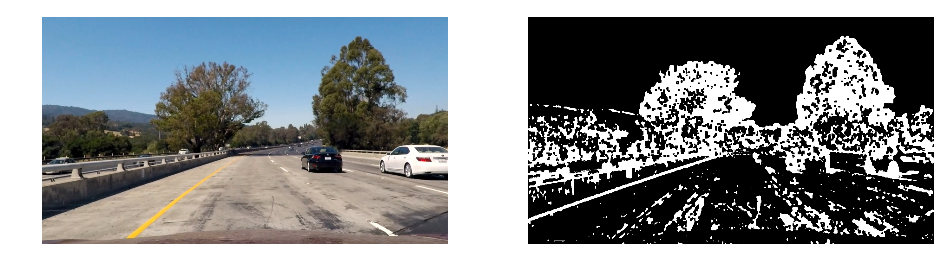

In [5]:
edges = edge_thresh(undist)

plt.figure(figsize=(11.5,8))
plt.subplot(121)
plt.axis('off')
plt.imshow(undist)
plt.subplot(122)
plt.axis('off')
plt.imshow(edges, cmap='gray')
plt.show()

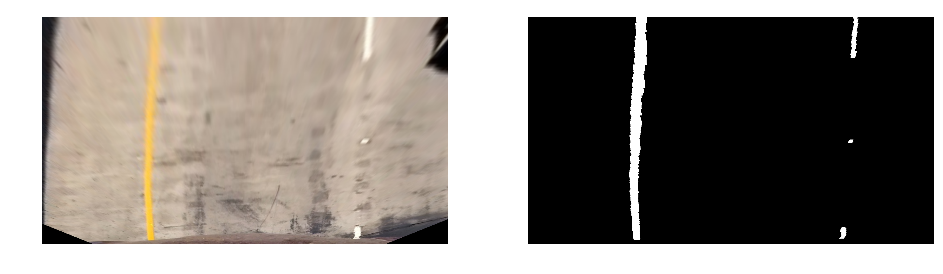

In [6]:
hls = color_thresh(undist)
bin_warped = warp(hls)

plt.figure(figsize=(11.5,8))
plt.subplot(121)
plt.axis('off')
plt.imshow(warped)
plt.subplot(122)
plt.axis('off')
plt.imshow(bin_warped, cmap='gray')
plt.show()

In [7]:
from lane import *

centroids = find_window_centroids(bin_warped, win_width=80, win_height=80, margin=100, minpix=500)
leftx, lefty, rightx, righty = extract_lane_pixels(bin_warped, centroids, margin=100)

# Fit a second order polynomial to each line
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Calculate radius of curvature in meters
y_eval = 720
curverad = curve_rad(lefty, leftx, rightx, righty, y_eval)
print(str(curverad) + 'm')


684m


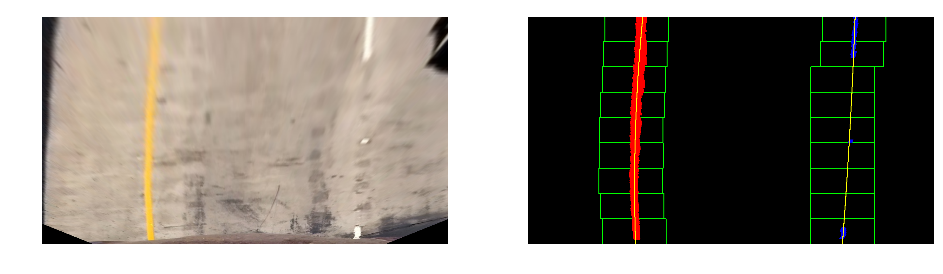

In [8]:
out_img = draw_window_centroids(bin_warped, centroids, leftx, lefty, rightx, righty, margin=100)

plt.figure(figsize=(11.5,8))
plt.subplot(121)
plt.axis('off')
plt.imshow(warped)
plt.subplot(122)
plt.axis('off')
plt.imshow(out_img)
plt.show()

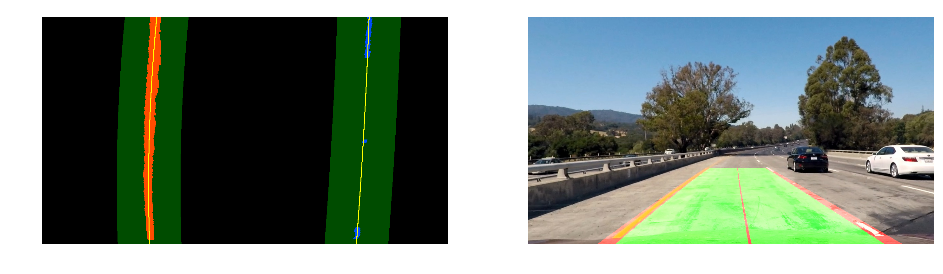

In [9]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "bin_warped")
# It's now much easier to find line pixels!
leftx, lefty, rightx, righty = fast_lane_extract(bin_warped, left_fit, right_fit, margin=100)
fitted = draw_fitted_curve(bin_warped, leftx, lefty, rightx, righty)
lane = draw_lane(undist, left_fit, right_fit)

plt.figure(figsize=(11.5,8))
plt.subplot(121)
plt.axis('off')
plt.imshow(fitted)
plt.subplot(122)
plt.axis('off')
plt.imshow(lane)
plt.show()

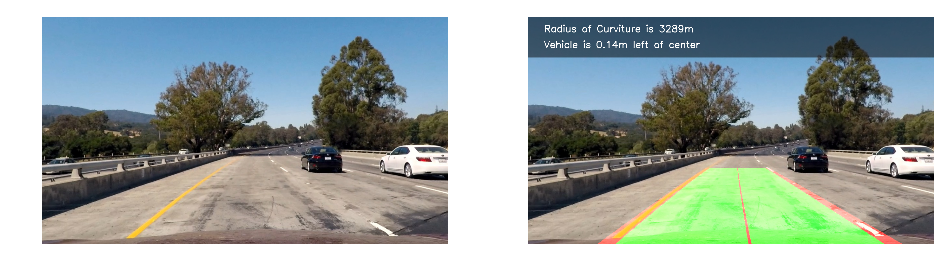

In [10]:
diff = center_diff(left_fit, right_fit, lane.shape[0], lane.shape[1] // 2)
from_center = 'left' if diff < 0 else 'right'
radius = curve_rad(leftx, lefty, rightx, righty, lane.shape[0])
draw_header(lane, 130)
draw_text(lane, "Radius of Curviture is {0}m".format(radius), pos = (50, 50))
draw_text(lane, "Vehicle is {0:.2f}m {1} of center".format(abs(diff), from_center), pos = (50, 100))

plt.figure(figsize=(11.5,8))
plt.subplot(121)
plt.axis('off')
plt.imshow(undist)
plt.subplot(122)
plt.axis('off')
plt.imshow(lane)
plt.show()